In [13]:
#загузка используемых библиотек
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
# задаем размер фигур
sns.set_theme(
    style="whitegrid",
    rc={"figure.figsize": (7, 3.5)}
)

In [2]:
#сгененируем распределение
mu = 100
sigma = 10
population = np.round(np.random.normal(mu, sigma, 1000), 2)

<Axes: ylabel='Count'>

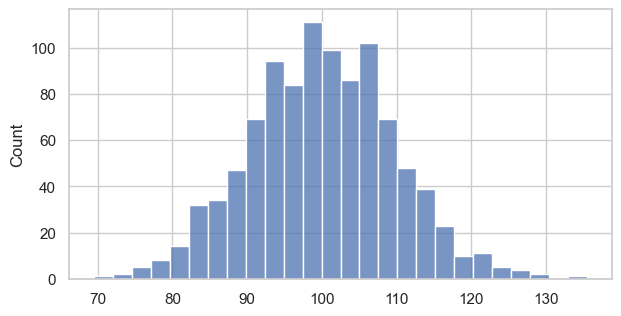

In [14]:
#Визуализируем график
sns.histplot(population, kde = False)

In [16]:
population.mean()

np.float64(99.99471)

In [17]:
population.std()

np.float64(9.758830232968497)

In [18]:
#Получение выборочного среднего
sample_size = 30 #можно менять размер выбороки  и из-за этого будет меняться стандартная ошибка среднего
sample = np.random.choice(population, sample_size, False)
sample.mean()

np.float64(97.797)

In [19]:
n = 10000
sample_means = []
for i in range(n):
    sample = np.random.choice(population, sample_size, False)
    sample_means.append(sample.mean())

<Axes: ylabel='Count'>

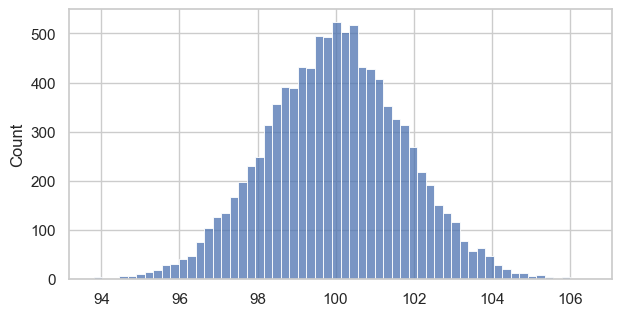

In [20]:
sns.histplot(sample_means, kde = False)

In [ ]:
# правило трех сигм - 100% в этом диапазоне
# правило 1.96 сигм ~ 95% в этом диапазоне
# se = sigma / корень(n)

In [21]:
#Стандартная ошибка
se = population.std() / sample_size ** 0.5
se

np.float64(1.781710484486747)

In [22]:
np.std(sample_means)

np.float64(1.7541157127304599)

In [23]:
# Диапазон, в котором лежит 95% наблюдений
population.mean() + 1.96 * se
population.mean() - 1.96 * se

np.float64(96.50255745040597)

In [24]:
#=============
sample_real = np.random.choice(population, sample_size, False)
sample_real

array([135.5 , 101.5 ,  99.31,  90.01, 104.7 ,  91.3 ,  97.47, 112.24,
        99.85,  94.6 ,  97.78,  85.58, 109.05, 100.49, 102.21,  98.05,
       103.  ,  95.51, 102.31,  80.51, 103.6 ,  94.73, 108.87, 111.35,
       110.84, 114.76, 119.98,  94.93, 112.72,  97.03])

In [25]:
sample_real.mean()

np.float64(102.32600000000001)

In [26]:
sample_real.std()

np.float64(10.615741958682555)

In [28]:
sd = sample_real.std() / sample_size ** 0.5
sd

np.float64(1.9381604451415035)

In [ ]:
# как вычислить z значение (sample_mean - mu) / se 

In [29]:
z_scores = []
n = 10000

mu = population.mean()
sigma = population.std()

se = sigma / sample_size ** 0.5

for i in range(n):
    sample = np.random.choice(population, sample_size, False)
    sample_mean = sample.mean()
    
    z_score = (sample_mean - mu) / se
    z_scores.append(z_score)

<Axes: ylabel='Count'>

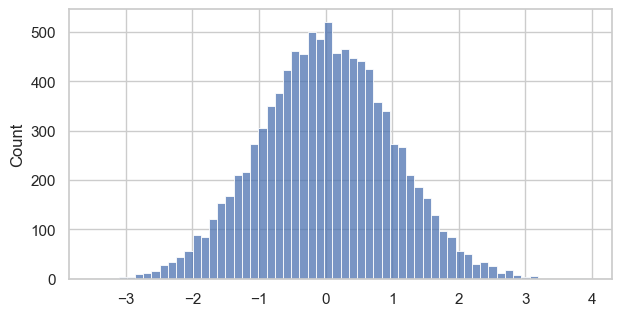

In [30]:
sns.histplot(z_scores, kde=False) # Z-распределение

In [33]:
#Рассчет z-значения для конкретной выборки

t_scores = []

n = 10000
for i in range(n):
    sample = np.random.choice(population, sample_size, False)
    sample_mean = sample.mean()
    sample_std = sample.std()
    
    sd = sample_std / sample_size ** 0.5
    t_score = (sample_mean - mu) / sd
    t_scores.append(t_score)

<Axes: ylabel='Count'>

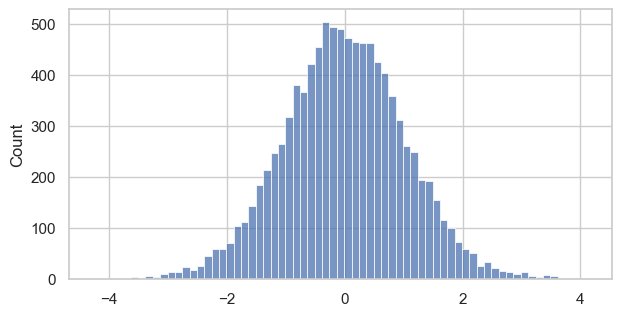

In [34]:
sns.histplot(t_scores, kde=False)

<Axes: ylabel='Count'>

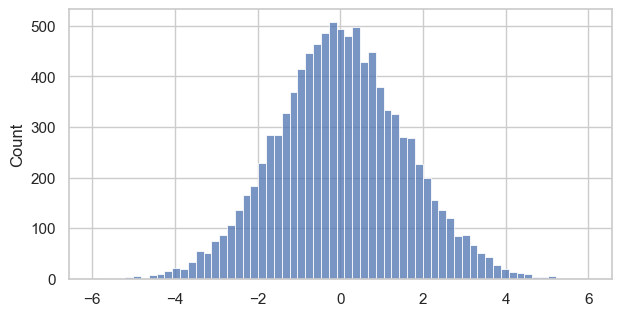

In [35]:
#Что будет если сделать sample size поменьше - для Z-score ничего не изменилось
sample_size_1 = 10
z_scores_1 = []
n = 10000

for i in range(n):
    sample_1 = np.random.choice(population, sample_size_1, False)
    sample_mean_1 = sample_1.mean()
    
    z_score_1 = (sample_mean_1 - mu) / se
    z_scores_1.append(z_score_1)
    
sns.histplot(z_scores_1, kde=False)

<Axes: ylabel='Count'>

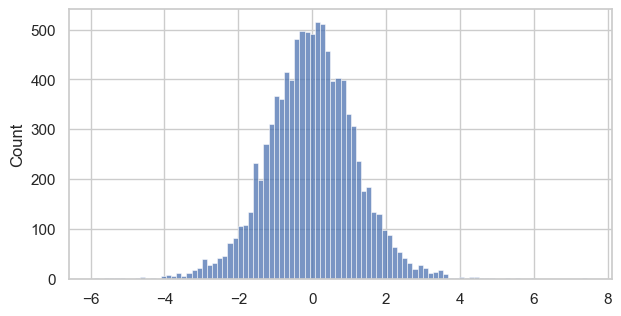

In [37]:
#Что будет если сделать sample size поменьше - а вот для t-scores
t_scores_1 = []
sample_size_1 = 10 #можно менять размер выборки, что бы посмотреть как изменяется распределение
n = 10000
for i in range(n):
    sample_12 = np.random.choice(population, sample_size_1, False)
    sample_mean_12 = sample_12.mean()
    sample_std_12 = sample_12.std()
    
    se_ = sample_std_12 / sample_size_1 ** 0.5
    t_score_1 = (sample_mean_12 - mu) / se_
    t_scores_1.append(t_score_1)

sns.histplot(t_scores_1, kde=False)

In [38]:
sample_real.mean() + 2 * se

np.float64(106.27246437356932)

In [39]:
sample_real.mean() - 2 * se

np.float64(98.3795356264307)

In [40]:
df = sample_size - 1 #число степеней свободы

In [41]:
sample_real.mean() + 2.93 * se
sample_real.mean() - 2.93 * se

np.float64(96.54442969272095)